# Author: SUBHAJIT BANERJEE

## Internship: Data Science & Business Analytics, November, 2020

### GRIP: The Sparks Foundation

#### Task#6 : Prediction using Decision Tree Algorithm

### Decision Tree Algorithm 
Problem Statement: Create the Decision Tree classifier and visualize it graphically.

#### Steps that we follow:
1. Reading the dataset
2. Checking and cleaning the data
3. Preprocessing
4. Building Decision Tree algorithm
5. Graphical Presentation

In [1]:
# Import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required library
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# Importing and reading the dataset
iris_data = pd.read_csv(r'D:\The Spark Foundation\Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Info Checking
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Column wise Null value checking
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No Null value present.**

In [6]:
# Row wise null value checking
iris_data.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

**No null value present**

In [7]:
# Duplicate value checking
iris_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

**No duplicate value**

In [8]:
# Counting each species present in the dataset
iris_data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

**All Species are in same quantity**

In [10]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# Droping ID column as it as no need for analysis
iris_data.drop(['Id'], axis=1, inplace=True)

In [12]:
# Putting feature variable to X
X = iris_data.drop('Species', axis=1)

# Putting response Var to y
y = iris_data['Species']

In [13]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [14]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

## Decision Tree Algorithm
**A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. We split the nodes on the basis of the feature value.
It is a flowchart-like structure helps us in decision making.**

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [18]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

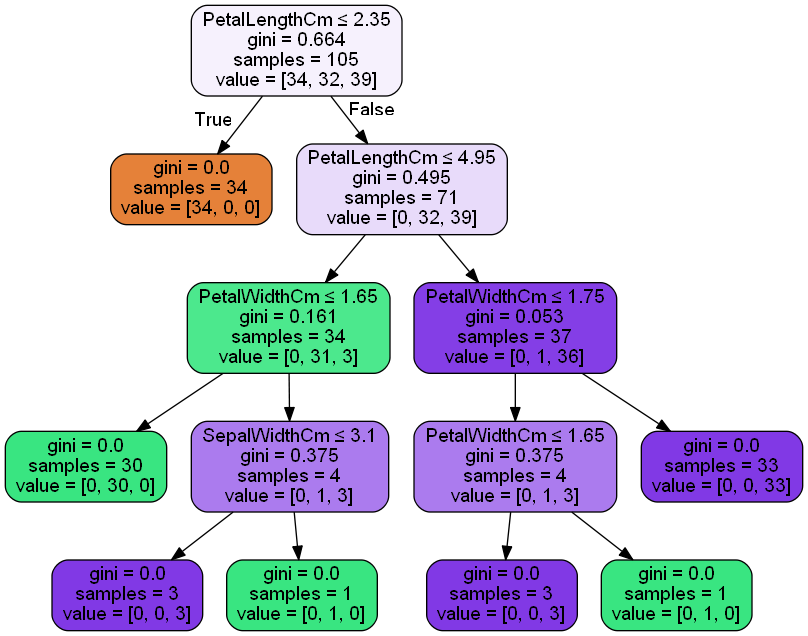

In [20]:
# plotting tree
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [21]:
# Making Prediction
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
# Train set Acuracy & Confusion Matrix Check
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[34,  0,  0],
       [ 0, 32,  0],
       [ 0,  0, 39]], dtype=int64)

In [24]:
# Test set Acuracy & Confusion Matrix Check
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9777777777777777


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report

In [28]:
# Classificatio Report
print('Report:', classification_report(y_test, y_test_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45




**From above output we can say that**

our accuracy is 0.9777 means our model is 97.77% accurate. In precision,High Precision means that false positive rate is low. we have got 0.92 precision which is quite good. we got recall as 0.94 which is also very good for this model as it is the above range of 0.5. f1-score gives better result especially when we have uneven class distribution. Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision. In our case accuracy score and f1 score not differ much,f1 score is 0.96. No need of further hyperparametre tunning as the outcome satisfy the expectation in much better way

### Thats all about the Task

### Thank You